In [ ]:
 
import fbprophet
# print version number
print('Prophet %s' % fbprophet.__version__)

Prophet 0.7.1


In [ ]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
total=read_csv('/content/_total3_p.csv')
#total.describe()

In [ ]:
import pandas as pd
total.date=pd.to_datetime(total.date)
total.sort_values(by='date',inplace=True)
#total['date']

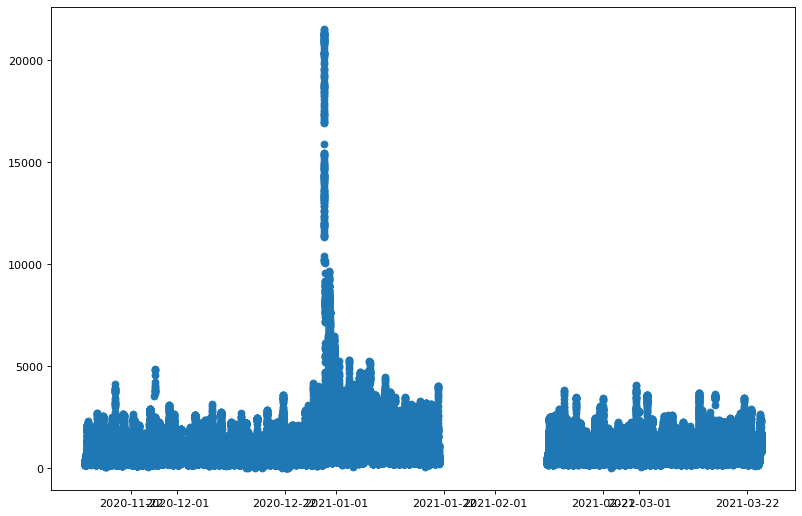

In [ ]:
 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(12, 8), dpi=80)
x = total.date
y = total.broj_gledatelja

plt.scatter(x, y)
plt.show()

In [ ]:
total.shape
split_size=int(0.3*total.shape[0])
split_size

34613

In [ ]:
import pandas as pd
# (r.d + " " + str(r.h)+":" +str(r.m)) 
#total['timestring']= [ (r.d + " " + str(r.h)+":" +str(r.m)) for  d,h,m in zip(total[['d_x','h_x','m_x']] )] 
df=total[['date','broj_gledatelja']]
df.columns=['ds', 'y']
split_size=int(0.3*total.shape[0])


df.sort_values(by='ds', inplace=True)
future=df[-1*split_size:]
future
train=df[:-1*split_size]
train

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ds,y
0,2020-11-13 00:00:00,397
1,2020-11-13 00:01:00,405
2,2020-11-13 00:02:00,395
3,2020-11-13 00:03:00,368
4,2020-11-13 00:04:00,356
...,...,...
80760,2021-02-19 03:16:00,178
80761,2021-02-19 03:17:00,181
80762,2021-02-19 03:18:00,178
80763,2021-02-19 03:19:00,177


In [ ]:
 
from fbprophet import Prophet
# load data
 
# prepare expected column names
#df.columns = ['ds', 'y']
#df['ds']= to_datetime(df['ds'])


# define the model
model = Prophet(weekly_seasonality=True,daily_seasonality=True)
# fit the model
model.fit(train)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [ ]:
# future = list()
# for i in range(1, 13):
# 	date = '2021-%02d' % i
# 	future.append([date])
# future = DataFrame(future)
# future1=future['ds']
# future1.columns = ['ds']
future1= future['ds']
future1


31598   2021-02-19 19:33:00
31599   2021-02-19 19:34:00
31600   2021-02-19 19:35:00
31601   2021-02-19 19:36:00
31602   2021-02-19 19:37:00
                ...        
45135   2021-03-24 17:23:00
45136   2021-03-24 17:24:00
45137   2021-03-24 17:25:00
45138   2021-03-24 17:26:00
45139   2021-03-24 17:27:00
Name: ds, Length: 13542, dtype: datetime64[ns]

                   ds        yhat  yhat_lower   yhat_upper
0 2020-11-13 00:00:00  272.957170 -847.751004  1354.767319
1 2020-11-13 00:01:00  269.099066 -807.068593  1322.105967
2 2020-11-13 00:02:00  265.246386 -855.919421  1237.924662
3 2020-11-13 00:03:00  261.399782 -846.411965  1267.768695
4 2020-11-13 00:04:00  257.559903 -822.325207  1315.655931


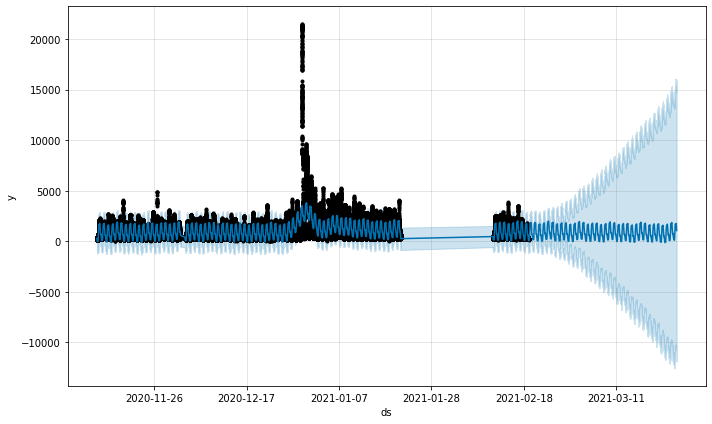

In [ ]:

# make an out-of-sample forecast
from pandas import read_csv
from pandas import to_datetime
from pandas import DataFrame
from fbprophet import Prophet
from matplotlib import pyplot
# load data
#path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
# df = read_csv(path, header=0)
# # prepare expected column names
# df.columns = ['ds', 'y']
# df['ds']= to_datetime(df['ds'])
# # define the model
# model = Prophet()
# # fit the model
# model.fit(df)
# define the period for which we want a prediction
# future = list()
# for i in range(1, 13):
# 	date = '2021-%02d' % i
# 	future.append([date])
future1 = pd.DataFrame(future['ds'])
future1 = pd.DataFrame(df['ds'])

future1.columns = ['ds']
future1['ds']= pd.to_datetime(future1['ds'])
# use the model to make a forecast
forecast = model.predict(future1)
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
model.plot(forecast)
pyplot.show()

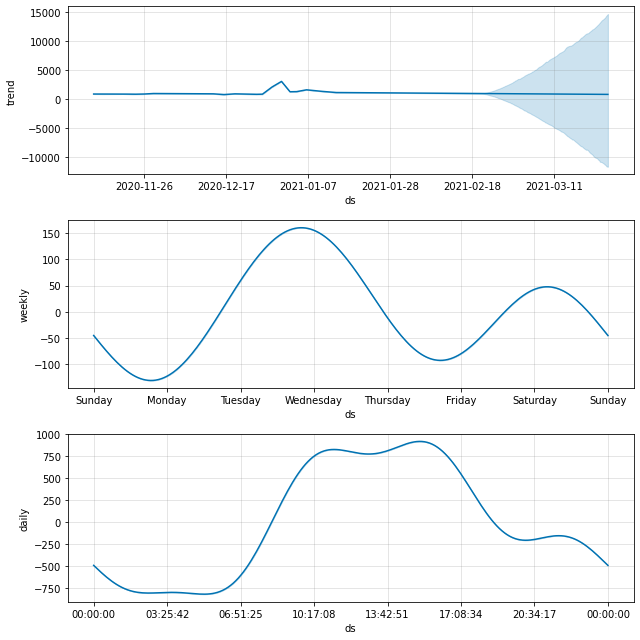

In [ ]:
fig2 = model.plot_components(forecast)

In [ ]:
forecast['t']=df['y'].values
forecast[['ds','yhat','t']].plot()

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fb0b27fadd0> (for post_execute):


ValueError: ignored

ValueError: ignored

,ds,y
28378,2021-02-22 11:33:00,190
28379,2021-02-22 11:34:00,194
28380,2021-02-22 11:35:00,188
28381,2021-02-22 11:36:00,207
28382,2021-02-22 11:37:00,205
...,...,...
110827,2021-03-22 23:56:00,561
110828,2021-03-22 23:57:00,582
110829,2021-03-22 23:58:00,606
110830,2021-03-22 23:59:00,640


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(12, 8), dpi=80)
forecast[['ds','yhat','t']] 
x = forecast.ds
y = forecast.t#-forecast.yhat
y2=forecast.yhat
plt.plot(x, y)
plt.plot(x, y2)
plt.show()

AttributeError: ignored

<Figure size 960x640 with 0 Axes>